In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# reading the final_formula data which is generated by feature engineering of atomic and formula dataset 
final_df= pd.read_csv("/home/rs/21CS91R11/vikash/final_formula_df.csv" , header = None)

In [3]:
final_df 

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,1,61.515523,17.701955,30.107962,10.831034,35.276991,7.0,18.569248,7.0,10.482182,...,0.944804,1,0.236201,0,0.059050,0,0.514763,1,0.128691,0.0
1,1,76.182167,70.818500,43.998618,18.414058,47.999539,28.0,25.333180,10.0,14.795151,...,0.773338,1,0.924446,1,0.308149,0,0.102716,0,0.034239,0.0
2,0,137.258303,62.514210,56.846882,15.937682,71.461721,23.0,24.365430,7.0,13.089577,...,0.284484,0,0.071121,0,0.017780,0,0.004445,0,0.001111,0.0
3,1,172.605500,56.348000,72.286397,9.557313,88.321599,20.0,29.580400,9.0,15.045893,...,0.166853,0,0.041713,0,0.010428,0,0.002607,0,1.000652,2.0
4,0,117.141413,34.487650,51.965005,20.540789,62.991251,13.0,24.747813,10.0,13.163021,...,0.284271,0,0.071068,0,0.017767,0,0.004442,0,0.001110,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,38.564543,34.388400,27.476513,16.225261,22.782359,16.0,15.540337,14.0,8.409357,...,0.621048,1,0.660150,1,0.094307,0,0.584901,1,0.083557,0.0
10280,1,28.999779,39.845600,11749.539113,18580.419802,632.186269,18.0,45.483488,12.0,7.722675,...,0.230938,1,0.012155,0,0.000640,0,0.000034,0,0.000002,0.0
10281,1,31.153020,47.546600,10634.313713,18580.367225,1533.901959,21.0,233.271708,5.0,38.650786,...,0.027124,0,0.003875,0,0.000554,0,0.000079,0,0.000011,0.0
10282,0,53.271086,105.760600,10642.521183,18576.991483,1543.788740,43.0,235.684106,4.0,39.499379,...,0.043783,0,0.291969,1,0.041710,0,0.005959,0,0.000851,0.0


In [4]:
Y = final_df[0]
X = final_df.drop(0,axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 , random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
feature_names = [f"F{i}" for i in range(X.shape[1])]
rfc = RandomForestClassifier( random_state = 0)

In [7]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [8]:
y_pred = rfc.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [9]:
#Confusion_matix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred, normalize='all')
cm

array([[0.69470102, 0.03451629],
       [0.05979582, 0.21098687]])

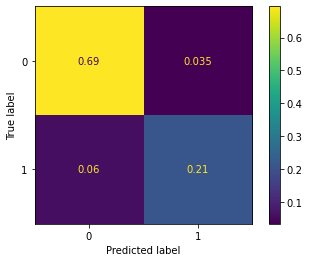

In [10]:
#confusion_matrix display
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred, labels=rfc.classes_ , normalize = 'all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot() 

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(y_test,y_pred)

0.9056878949927079

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1500
           1       0.86      0.78      0.82       557

    accuracy                           0.91      2057
   macro avg       0.89      0.87      0.88      2057
weighted avg       0.90      0.91      0.90      2057



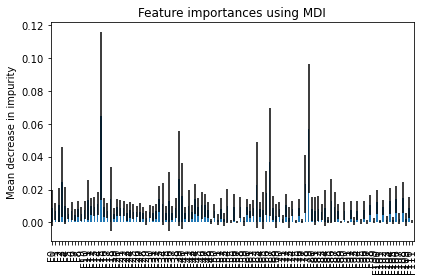

In [14]:
#Feature importance
import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
rfc_importances = pd.Series(importances, index=feature_names)
std_final = []               # list std data which has lvalue more than 0.017
for i in range(len(std)):
    if(std[i]>=0.018):
        std_final.append((rfc_importances.index[i],std[i]))
        
        


fig, ax = plt.subplots()

rfc_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [15]:
std_final        # list std data which has value more than 0.017

[('F3', 0.021216144763635286),
 ('F15', 0.05103215399507947),
 ('F18', 0.019372282370558474),
 ('F39', 0.028954105046647402),
 ('F40', 0.019894745828205104),
 ('F63', 0.026202298782679535),
 ('F67', 0.032857685194473456),
 ('F79', 0.039057815285164554)]

In [16]:
x1 = pd.DataFrame(std_final)
x1

,0,1
0,F3,0.021216
1,F15,0.051032
2,F18,0.019372
3,F39,0.028954
4,F40,0.019895
5,F63,0.026202
6,F67,0.032858
7,F79,0.039058


<AxesSubplot:xlabel='0'>

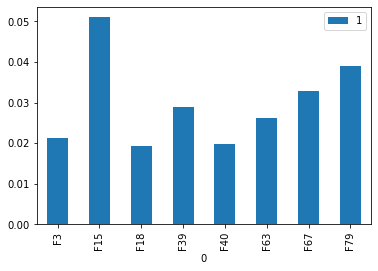

In [17]:
x1.plot.bar(x=0)

In [18]:
rfc_importance_final = []
for i in range(len(rfc_importances)):
    if(rfc_importances[i]>0.017):
        rfc_importance_final.append((rfc_importances.index[i],rfc_importances[i]*100)) 
        
df2 = pd.DataFrame(rfc_importance_final)
df2

,0,1
0,F3,2.437261
1,F15,6.466706
2,F39,2.658756
3,F63,2.297082
4,F66,1.789479
5,F67,3.701487
6,F78,2.335794
7,F79,5.707216


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='features', ylabel='Feature Importance(%)'>

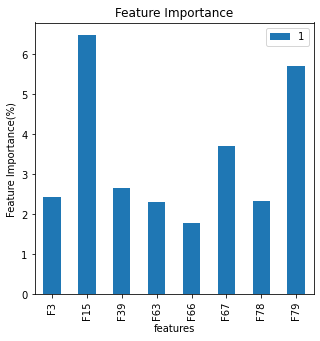

In [19]:
df2.plot.bar(x=0, xlabel='features',ylabel='Feature Importance(%)', title='Feature Importance',figsize=(5,5), )

In [20]:
su = df2.rename(columns={df2.columns[1]: 'score'})
su.sort_values(by='score',inplace=True, ascending= False)
su

,0,score
1,F15,6.466706
7,F79,5.707216
5,F67,3.701487
2,F39,2.658756
0,F3,2.437261
6,F78,2.335794
3,F63,2.297082
4,F66,1.789479


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='features', ylabel='Feature Importance(%)'>

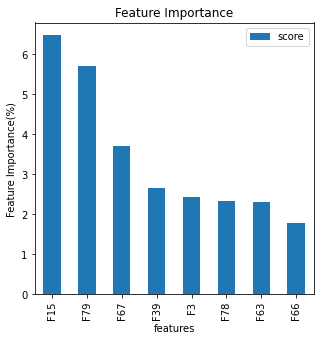

In [21]:
su.plot.bar(x=0, xlabel='features',ylabel='Feature Importance(%)', title='Feature Importance',figsize=(5,5), )

In [22]:
rfc.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [23]:
#visualization of decision trees in random forest 
'''from sklearn import tree
rfc.estimators_
plt.figure(figsize=(5,5))
tree.plot_tree(rfc.estimators_[99],filled=True)''' 

'from sklearn import tree\nrfc.estimators_\nplt.figure(figsize=(5,5))\ntree.plot_tree(rfc.estimators_[99],filled=True)'

# randomized search cv algorithm for hyperparameter tuning 

In [24]:
import warnings
warnings.filterwarnings('ignore')
n_estimators = [int(x) for x in np.linspace(10,1000,num=10)]
max_features = ['','sqrt','log']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
criterion = ['gini','entropy','log_loss']

param_distribution = {"n_estimators":n_estimators,
                      "max_depth":max_depth,
                    "max_features": max_features,
                     "min_samples_split":min_samples_split,
                     "min_samples_leaf":min_samples_leaf,
                     "criterion":criterion}
from sklearn.model_selection import RandomizedSearchCV
random_search_clf = RandomizedSearchCV(rfc,param_distribution,n_iter=100, cv =4,n_jobs =-1 , verbose =1,random_state=100)
search = random_search_clf.fit(x_train,y_train)
search.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


{'n_estimators': 670,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [25]:
rf_randomcv_grid = search.best_estimator_
y_pred = rf_randomcv_grid.predict(x_test)

In [26]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred, normalize='all'))
print(classification_report(y_test,y_pred))

0.9066601847350511
[[0.69324259 0.03597472]
 [0.05736509 0.2134176 ]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1500
           1       0.86      0.79      0.82       557

    accuracy                           0.91      2057
   macro avg       0.89      0.87      0.88      2057
weighted avg       0.91      0.91      0.91      2057



# gridsearchcv for hyperparameter tuning 

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" :    [search.best_params_['n_estimators']-200 ,search.best_params_['n_estimators']-200 , 
                                   search.best_params_['n_estimators'],search.best_params_['n_estimators']+100,search.best_params_['n_estimators']+200, search.best_params_['n_estimators']+330],
              "min_samples_split":[search.best_params_['min_samples_split']-1,search.best_params_['min_samples_split'],
                                   search.best_params_['min_samples_split']+1],
              "min_samples_leaf": [search.best_params_['min_samples_leaf']-1,search.best_params_['min_samples_leaf'],
                                   search.best_params_['min_samples_leaf']+1],
              "max_features" :    [search.best_params_['max_features']],
              "max_depth":        [search.best_params_['max_depth']-20 ,search.best_params_['max_depth']-10 , search.best_params_['max_depth'], 
                                   search.best_params_['max_depth']+20 , search.best_params_['max_depth']+40, search.best_params_['max_depth']+60
                                  ],
              "criterion":        [search.best_params_['criterion']]
            }
grid_search_clf = GridSearchCV(rfc,param_grid,cv=4,n_jobs= -1 ,verbose=1)
grid_search = grid_search_clf.fit(x_train,y_train)
grid_search.best_params_

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 870}

In [28]:
y_pred = grid_search.best_estimator_.predict(x_test)

In [29]:
best_rfc = grid_search.best_estimator_

In [30]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred,normalize='all'))
print(classification_report(y_test,y_pred))

0.9086047642197375
[[0.69518717 0.03403014]
 [0.05736509 0.2134176 ]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1500
           1       0.86      0.79      0.82       557

    accuracy                           0.91      2057
   macro avg       0.89      0.87      0.88      2057
weighted avg       0.91      0.91      0.91      2057



In [31]:
importances_new = best_rfc.feature_importances_
best_rfc_importances = pd.Series(importances_new, index=feature_names)
best_rfc_importances.head(10)
        

F0    0.009726
F1    0.005981
F2    0.010609
F3    0.022568
F4    0.008861
F5    0.005375
F6    0.007408
F7    0.003666
F8    0.007710
F9    0.005568
dtype: float64

In [32]:
# feature importance > 1.8%
rfc_importance_bestmodel = []
for i in range(len(best_rfc_importances)):
    if(best_rfc_importances[i]>0.018):
        rfc_importance_bestmodel.append((best_rfc_importances.index[i],best_rfc_importances[i]*100)) 
        
df3 = pd.DataFrame(rfc_importance_bestmodel)
df3

,0,1
0,F3,2.256821
1,F15,5.437936
2,F39,3.008774
3,F63,2.425185
4,F66,1.843903
5,F67,3.711296
6,F78,2.255948
7,F79,5.765749


In [33]:
df3 = df3.rename(columns={df3.columns[1]: 'score' ,df3.columns[0]:'features' })
df3.sort_values(by='score',inplace=True, ascending= False)
df3

,features,score
7,F79,5.765749
1,F15,5.437936
5,F67,3.711296
2,F39,3.008774
3,F63,2.425185
0,F3,2.256821
6,F78,2.255948
4,F66,1.843903


In [34]:
import numpy as np 

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Feature Importance(%)'>

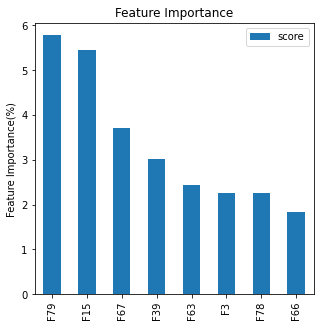

In [35]:
df3.plot.bar(x='features', xlabel = '' , ylabel='Feature Importance(%)', title='Feature Importance',figsize=(5,5) )

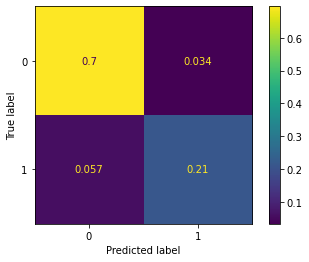

In [36]:
#confusion_matrix display
cm_best = confusion_matrix(y_test,y_pred, labels=best_rfc.classes_ , normalize = 'all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best,display_labels=best_rfc.classes_)
disp.plot() 

In [37]:
final_rfc_model = grid_search.best_estimator_